# Please Share The link In Proper Fromat

### Applied Data Science Capstone - IBM/Coursera 

## Introduction:

To reduce the frequency of car collisions in a community, an algorithm must be developed to predict the severity of an accident given the current weather, road and visibility conditions. When conditions are bad, this model will alert drivers to remind them to be more careful.

## Business problem: 

The purpose of this project is to analyze the collision dataset for the city Seattle and find patterns, also determine key factors such as weather, light and road conditions, drug or alcohol influence, to provide the best traffic accident severity prediction.

## Data Understanding: 

We will use SEVERITYCODE as our dependent variable Y, and try different combinations of independent variables X to get the result.



In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [3]:
#read and save data in df 
df = pd.read_csv("Data-Collisions.csv")
df.dtypes

C:\Users\LENOVO\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [4]:
df.head()


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [5]:
df["WEATHER"] = df["WEATHER"].astype('category')
df["ROADCOND"] = df["ROADCOND"].astype('category')
df["LIGHTCOND"] = df["LIGHTCOND"].astype('category')

df["WEATHER_CAT"] = df["WEATHER"].cat.codes
df["ROADCOND_CAT"] = df["ROADCOND"].cat.codes
df["LIGHTCOND_CAT"] = df["LIGHTCOND"].cat.codes

In [6]:
Collisions = df[['SEVERITYCODE','COLLISIONTYPE','ADDRTYPE','WEATHER_CAT','ROADCOND_CAT','LIGHTCOND_CAT']]
Collisions.head()

,SEVERITYCODE,COLLISIONTYPE,ADDRTYPE,WEATHER_CAT,ROADCOND_CAT,LIGHTCOND_CAT
0,2,Angles,Intersection,4,8,5
1,1,Sideswipe,Block,6,8,2
2,1,Parked Car,Block,4,0,5
3,1,Other,Block,1,0,5
4,2,Angles,Intersection,6,8,5


## Analyzing Value Counts

In [7]:
Collisions['SEVERITYCODE'].value_counts()


1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

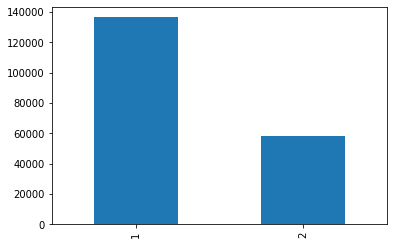

In [8]:
Collisions['SEVERITYCODE'].value_counts().plot(kind='bar')


In [9]:
Collisions['COLLISIONTYPE'].value_counts()


Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64

In [10]:
Collisions['ADDRTYPE'].value_counts()


Block           126926
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

In [11]:
Collisions['WEATHER_CAT'].value_counts()


 1     111135
 6      33145
 4      27714
 10     15091
-1       5081
 9        907
 3        832
 2        569
 8        113
 0         56
 7         25
 5          5
Name: WEATHER_CAT, dtype: int64

In [12]:
Collisions['ROADCOND_CAT'].value_counts()


 0    124510
 8     47474
 7     15078
-1      5012
 1      1209
 5      1004
 3       132
 6       115
 4        75
 2        64
Name: ROADCOND_CAT, dtype: int64

In [13]:
Collisions['LIGHTCOND_CAT'].value_counts()


 5    116137
 2     48507
 8     13473
 6      5902
-1      5170
 4      2502
 0      1537
 1      1199
 7       235
 3        11
Name: LIGHTCOND_CAT, dtype: int64

In [14]:
Collisions.dtypes


SEVERITYCODE      int64
COLLISIONTYPE    object
ADDRTYPE         object
WEATHER_CAT        int8
ROADCOND_CAT       int8
LIGHTCOND_CAT      int8
dtype: object

## Balancing the Dataset

Our target variable SEVERITYCODE is only 42% balanced. In fact, severitycode in class 1 is nearly three times the size of class 2.

We can fix this by downsampling the majority class.

In [15]:
from sklearn.utils import resample


In [16]:
# Seperate majority and minority classes
Collisions_majority = Collisions[Collisions.SEVERITYCODE==1]
Collisions_minority = Collisions[Collisions.SEVERITYCODE==2]

#Downsample majority class
Collisions_majority_downsampled = resample(Collisions_majority,
                                        replace=False,
                                        n_samples=58188,
                                        random_state=123)

# Combine minority class with downsampled majority class
Collisions_balanced = pd.concat([Collisions_majority_downsampled, Collisions_minority])

# Display new class counts
Collisions_balanced.SEVERITYCODE.value_counts()

2    58188
1    58188
Name: SEVERITYCODE, dtype: int64

## Methodology 

Define X and y



In [17]:
X = np.asarray(Collisions_balanced[['WEATHER_CAT', 'ROADCOND_CAT', 'LIGHTCOND_CAT']])
X[0:5]

array([[ 6,  8,  2],
       [ 1,  0,  5],
       [10,  7,  8],
       [ 1,  0,  5],
       [ 1,  0,  5]], dtype=int8)

In [18]:
y = np.asarray(Collisions_balanced['SEVERITYCODE'])
y [0:5]     

array([1, 1, 1, 1, 1], dtype=int64)

In [19]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.15236718,  1.52797946, -1.21648407],
       [-0.67488   , -0.67084969,  0.42978835],
       [ 2.61416492,  1.25312582,  2.07606076],
       [-0.67488   , -0.67084969,  0.42978835],
       [-0.67488   , -0.67084969,  0.42978835]])

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)
print("Train Set: ", X_train.shape, y_train.shape)
print("Test Set: ", X_test.shape, y_test.shape)

Train Set:  (81463, 3) (81463,)
Test Set:  (34913, 3) (34913,)


## KNN Model

In [21]:
# Building the KNN Model
from sklearn.neighbors import KNeighborsClassifier

k = 25

In [22]:
#Train Model & Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

Kyhat = neigh.predict(X_test)
Kyhat[0:5]

array([2, 2, 1, 1, 2], dtype=int64)

## Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
colDataTree = DecisionTreeClassifier(criterion="entropy", max_depth = 7)
colDataTree
colDataTree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Logistic Regression

In [29]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C = 6).fit(X_train,y_train)
LR

LogisticRegression(C=6, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
yhat = LR.predict(X_test)
yhat

array([1, 2, 1, ..., 2, 2, 2], dtype=int64)

## Results & Evaluation

### K-Nearest Neighbor

In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = neigh.predict(X_test)
print(y_pred[:10])

# and calculate the accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

[2 2 1 1 2 1 2 2 2 1]
Accuracy: 0.564001947698565


## Logistic Regression

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = LR.predict(X_test)
print(y_pred[:10])

# and calculate the accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

[1 2 1 1 1 1 1 1 2 1]
Accuracy: 0.5260218256809784


## Decision Tree

In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = colDataTree.predict(X_test)
print(y_pred[:10])

# and calculate the accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

[2 2 1 1 2 2 2 2 2 1]
Accuracy: 0.5664365709048206


## Evaluation

In the beginning of this notebook, we had categorical data that was of type 'object'. This is not a data type that we could have fed through an algoritim, so label encoding was used to created new classes that were of type int8; a numerical data type.

After solving that issue we were presented with another - imbalanced data. As mentioned earlier, class 1 was nearly three times larger than class 2. The solution to this was downsampling the majority class with sklearn's resample tool. We downsampled to match the minority class exactly with 58188 values each.

As we can see from the accuracy measure KNN has and accuracy of 0.564 , Logistic Regression has an accuracy of 0.526, and Decision Tree has an accuracy of 0.566. The best model has the largest accuracy so Decision Tree is the best model for our data.

## Conclusion

Based on historical data from weather conditions pointing to certain classes, we can conclude that particular weather conditions have a somewhat impact on whether or not travel could result in property damage (class 1) or injury (class 2).